In [64]:
import pandas as pd

#Reading and checking the data set.

myData = pd.read_csv(r"MBTI_DataSet.csv")



myData.head()



,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [65]:
myData.tail()

,p_types,comments
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [66]:
#Getting Summary information that describe the data set

myData.describe(include=['object'])

,p_types,comments
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [67]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_types   8675 non-null   object
 1   comments  8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [68]:
#Checking the order of the data matrix

myData.shape

(8675, 2)

In [69]:
#Checking for null values across attributes.
myData.isnull().any()

p_types     False
comments    False
dtype: bool

In [70]:
import numpy as np

#Getting the unique personalities.

p_types_unique = np.unique(np.array(myData['p_types']))
print(p_types_unique)

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [71]:
#Grouping the data based on personality types for some statistical analysis

#The commenters/bloggers with same personity group, made 50 comments 
#each so we multiply by 50 to get the total number of posts. 

groupSummary = (myData.groupby(['p_types']).count()) * 50
groupSummary

,comments
p_types,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Summary comments for each personality type')

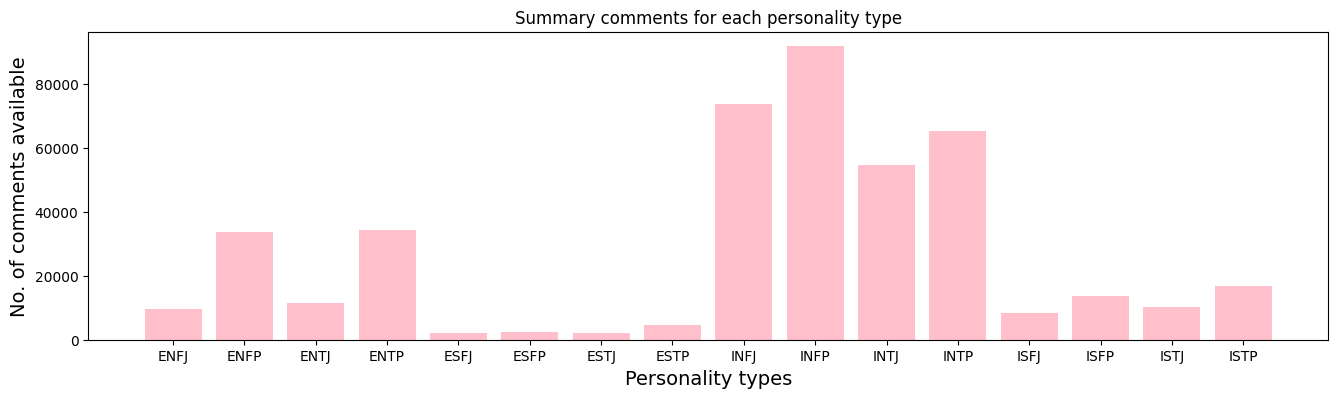

In [72]:
import matplotlib.pyplot as plot
plot.figure(figsize = (16,4))
plot.bar(np.array(groupSummary.index), height = groupSummary['comments'],color = "pink")
plot.xlabel('Personality types', size = 14)
plot.ylabel('No. of comments available', size = 14)
plot.title('Summary comments for each personality type')

<AxesSubplot: xlabel='p_types', ylabel='words_per_comment'>

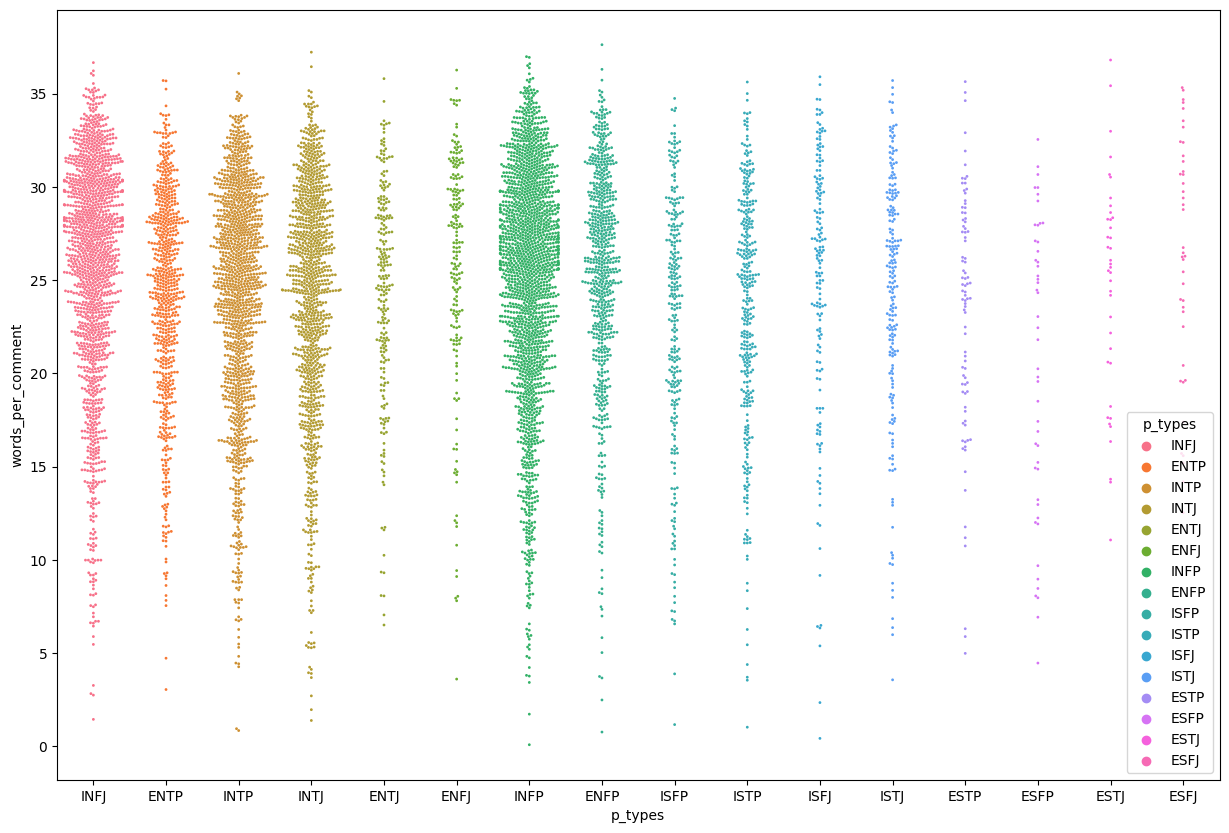

In [73]:
#making further analysis by generating additional features

myDataCopy = myData.copy()

#create a function that splits the words in the 50 comments of a user and calculates the variance of words-count in each row

def row_variance(row):
   
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    
    return np.var(l)
  

#this lambda function evaluates the number of words per comment out of the 50 posts in each row

myDataCopy['words_per_comment'] = myDataCopy['comments'].apply(lambda x: len(x.split())/50)


#this lambda function evaluates the variance of the word counts from the 50 posts in each row

myDataCopy['variance_of_word_counts'] = myDataCopy['comments'].apply(lambda x: row_variance(x))

plot.figure(figsize=(15,10))


#A swarm plot of the words per comment (that is, from the 50 posts per row) against the 16 unique personality types.
import seaborn as sns
sns.swarmplot(data=myDataCopy, x = "p_types", y = "words_per_comment", hue = "p_types", size = 2)

<Figure size 1500x1000 with 0 Axes>

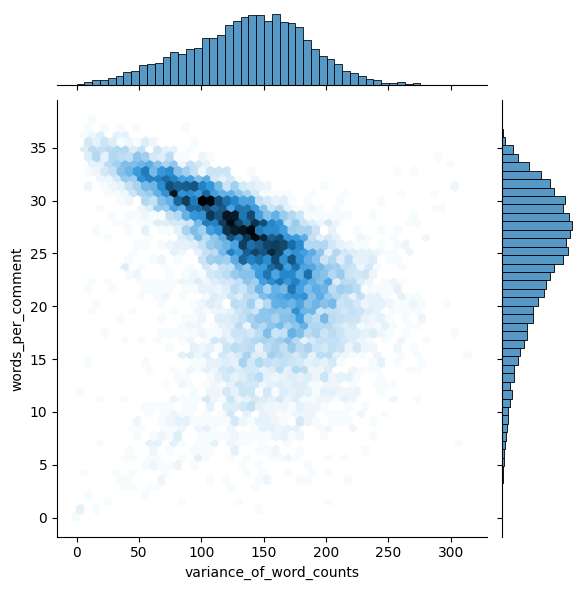

In [74]:
#A joint plot to visualize and analyse the relationship between the words per comment and 
#the variance of the word counts along with their individual distributions.

plot.figure(figsize = (15,10))
sns.jointplot(data=myDataCopy, x = "variance_of_word_counts", y = "words_per_comment",  kind="hex")

Text(0.5, 1.0, 'The Distribution of Lengths for all 50 Comments')

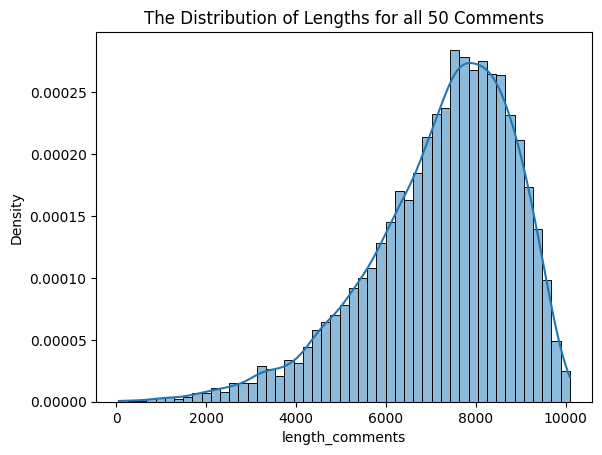

In [75]:
myDataCopy["length_comments"] = myDataCopy["comments"].apply(len)
sns.histplot(myDataCopy["length_comments"],stat = 'density',kde = True).set_title("The Distribution of Lengths for all 50 Comments")

In [76]:
#Investigating the most common words in all of the 50 posts in each row.

list_of_wordsList = list(myDataCopy["comments"].apply(lambda x: x.split()))
wordsList = [y for x in list_of_wordsList for y in x]

from collections import Counter
Counter(wordsList).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

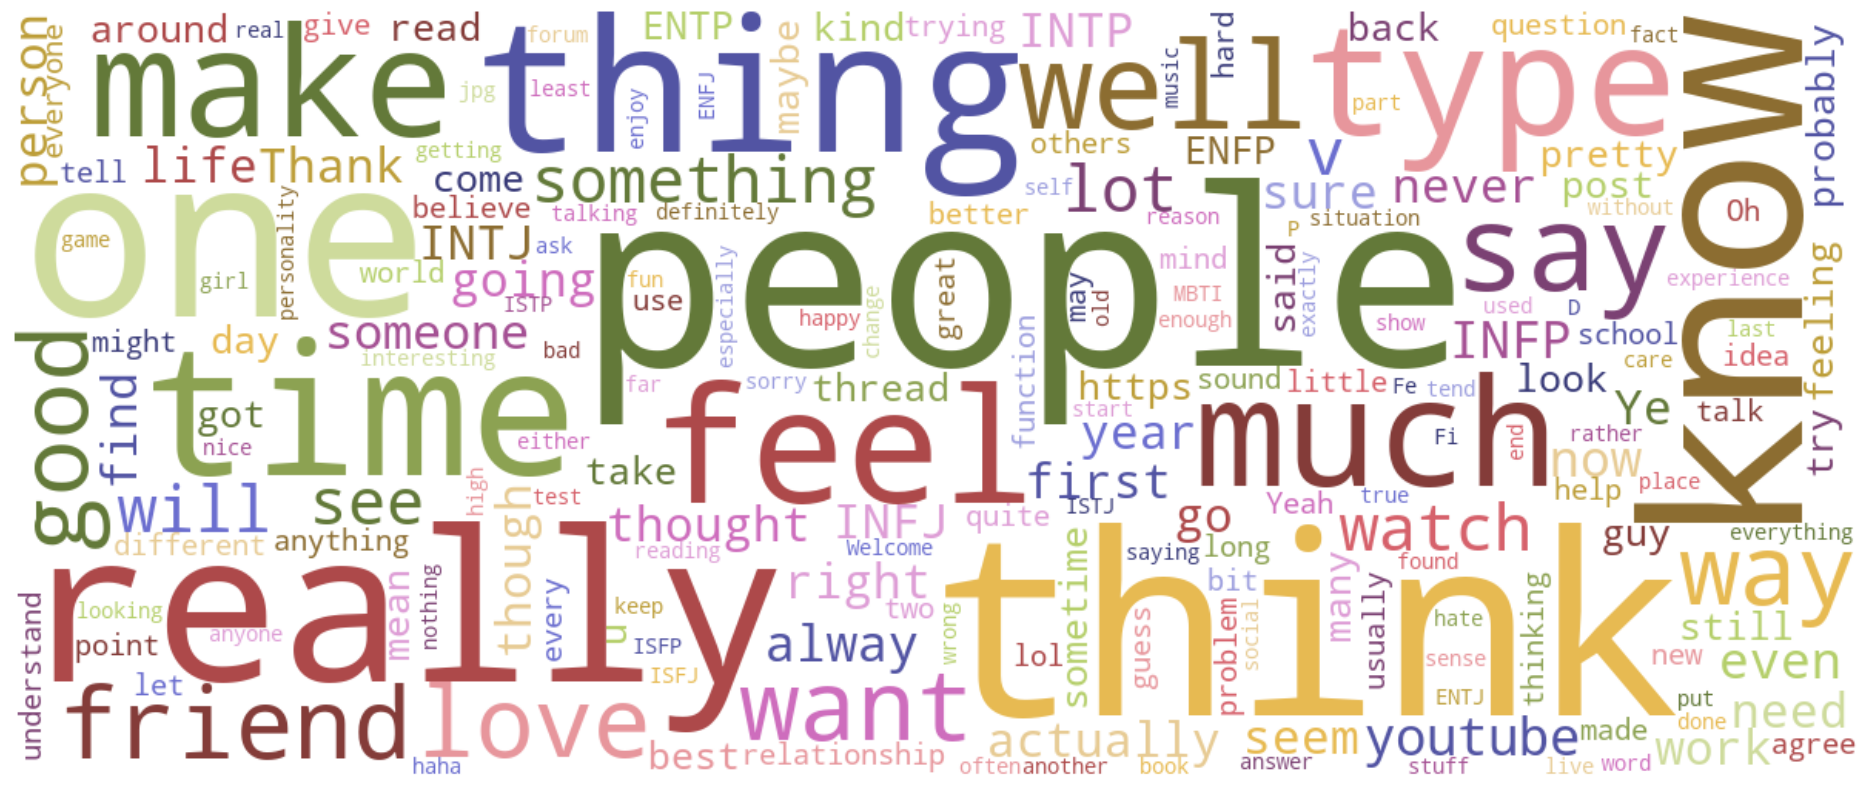

In [77]:
#Visualizing the most frequently occuring words.
from wordcloud import wordcloud

wc = wordcloud.WordCloud(width=1200, height=500,collocations=False, background_color="white", colormap="tab20b").generate(" ".join(wordsList))
plot.figure(figsize=(25,10))
plot.imshow(wc,interpolation = 'bilinear')
_ = plot.axis("off")

In [78]:
import re

#this function helps us to clean the data (user comments) by removing web links,punctuations,very short words, accidental letters, y - target variables (personality types) included while commenting, etc.
def preprocess_comments(myData):
    comments = myData['comments'].copy()
    labels = myData['p_types'].copy()
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^\w\s]','',x))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    myData["comments"] = myData["comments"].apply(lambda x: x.lower())
   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    
    return myData


cleaned_Data = preprocess_comments(myData)


#Remove rows with very minimal word counts
print("Before row reduction: Number of comments", len(cleaned_Data)) 

min_words = 15
cleaned_Data["no. of. words"] = cleaned_Data["comments"].apply(lambda x: len(re.findall(r'\w+', x)))

cleaned_Data = cleaned_Data[cleaned_Data["no. of. words"] >= min_words]
print("After row reduction: Number of comments", len(cleaned_Data))

Before row reduction: Number of comments 8675
After row reduction: Number of comments 8466


In [79]:
#Investigating the outcome of the cleaned data.

cleaned_Data.head()

,p_types,comments,no. of. words
0,INFJ,enfp intj moments sportscenter plays...,430
1,ENTP,finding lack these posts very alarming eo...,803
2,INTP,good course which know thats bles...,253
3,INTJ,dear intp enjoyed conversation other eos...,777
4,ENTJ,youre fired eostokendot thats another silly...,402


In [80]:
cleaned_Data.tail()

,p_types,comments,no. of. words
8670,ISFP,ixfp just because always think cats doms...,564
8671,ENFP,eostokendot eostokendot eostokendot this t...,18
8672,INTP,many questions when these things eostokendo...,715
8673,INFP,very conflicted right when comes wanting ...,1184
8674,INFP,been long since have been personalitycafe...,877


In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
pd.options.mode.chained_assignment = None  # default='warn'


cleaned_Data['p_type_encoded'] = encoder.fit_transform(cleaned_Data['p_types'])

print("\nEncoded Personality Type:\n\n", cleaned_Data.p_type_encoded)
#Target Data pre-processing is now completed.


Encoded Personality Type:

 0        8
1        3
2       11
3       10
4        2
        ..
8670    13
8671     1
8672    11
8673     9
8674     9
Name: p_type_encoded, Length: 8466, dtype: int32


In [82]:
import nltk 

#Please kindly download "stopwords" package using the syntax: nltk.download('stopwords') -if not available on your system.

# OR kindly perform in your command prompt, the operation: python -m nltk.downloader all

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
#vectorizing the comments for model training purposes, filtering "stop words".

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorized_comments = CountVectorizer(analyzer = 'word', stop_words='english')


trainingData_processed = vectorized_comments.fit_transform(cleaned_Data.comments)

#Training Data pre-processing is now completed.
print("\n Processed Comments:\n\n", trainingData_processed)

#investigating the order of the vectorised (and processed) comments.
trainingData_processed.shape


 Processed Comments:

   (0, 26126)	2
  (0, 43216)	2
  (0, 55136)	1
  (0, 81691)	1
  (0, 65541)	1
  (0, 66798)	1
  (0, 48914)	1
  (0, 28345)	2
  (0, 48902)	2
  (0, 26799)	2
  (0, 71911)	1
  (0, 88347)	1
  (0, 26797)	81
  (0, 63920)	1
  (0, 40922)	1
  (0, 87220)	2
  (0, 41849)	2
  (0, 32316)	1
  (0, 66458)	1
  (0, 28893)	1
  (0, 15600)	1
  (0, 83989)	1
  (0, 72339)	1
  (0, 63449)	1
  (0, 37850)	1
  :	:
  (8465, 96096)	1
  (8465, 81614)	1
  (8465, 64310)	1
  (8465, 87580)	1
  (8465, 8629)	1
  (8465, 3007)	1
  (8465, 20238)	1
  (8465, 16788)	2
  (8465, 25315)	1
  (8465, 85658)	1
  (8465, 72388)	1
  (8465, 11892)	1
  (8465, 57158)	1
  (8465, 37169)	1
  (8465, 16917)	1
  (8465, 48854)	1
  (8465, 86364)	1
  (8465, 77331)	1
  (8465, 15204)	1
  (8465, 88732)	1
  (8465, 70646)	1
  (8465, 67070)	1
  (8465, 85673)	1
  (8465, 6874)	1
  (8465, 5723)	1


(8466, 98555)

In [84]:
#pre-processed target data is passed to a new variable.
targetData_processed = cleaned_Data['p_type_encoded'] 


#**********************************************************
#TRAINING AND EVALUATION BEGINS
#**********************************************************

from sklearn.model_selection import train_test_split

#Splitting the processed data into training data and testing data in the 60-40 ratio scenario respectively.
X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.4, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))


(5079, 98555) (5079,) (3387, 98555) (3387,)


In [85]:
#A dictionary to report the performance of select algorithms under investigation.
results_accuracy = {}

#XG Boost 
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.87%


In [86]:

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.22%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)


Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Random Forest'] = accuracy * 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.53%


In [88]:
#Result Observation:
#The first scenario training and testing algorithm cases yielded unsatisfactory results with roughly average accuracies. 

#Testing out algorithms based on 70-30 train-test split ratio scenario
X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.3, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))


(5926, 98555) (5926,) (2540, 98555) (2540,)


In [89]:
#Second scenario training and testing

#A dictionary to report the performance of fewer select algorithms under investigation.
results_accuracy = {}

#XG Boost 
xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.56%


In [90]:
#Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.27%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:

#As is observed, the second phase 70-30 split scenario did not yield any positive improvement in accuracy.

#We resort to the MBTI system which divides the 16 classifications (that contains 4 personalities pair - each)
#across 4 classification axes (that contains 2 personalities pair - each)

myData2 = pd.read_csv(r"MBTI_DataSet.csv")
myData2

,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [92]:
#The rationale behind the MBTI division is borne out of the fact that, from the 16 personalities classes 

#which consist of 4 pair each, a person is ordinarily either:

#an introvert (I) or an extrovert (E)

#one that applies more of intuition (N) or more of sensing (S)

#one that takes decisions out of Thinking (T) or out of Feeling (F)

#one that tends to judge (J) or tends to perceive (P)
#***********************************************************************************************************


#function to add 4 columns that represents these classification axes.
def get_MBTI_types(records):
    p_type = records['p_types']
    I = 0; N = 0; T = 0; J = 0
    
    if p_type[0] == 'I':
        I = 1
    elif p_type[0] == 'E':
        I = 0
    
    if p_type[1] == 'N':
        N = 1
    elif p_type[1] == 'S':
        N = 0
    
    if p_type[2] == 'T':
        T = 1
    elif p_type[2] == 'F':
        T = 0
    
    if p_type[3] == 'J':
        J = 1
    elif p_type[3] == 'P':
        P = 0
    
    return pd.Series({'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

#The columns are added to the input Data in the vertical axis / direction.
myData2 = myData2.join(myData2.apply (lambda records: get_MBTI_types(records),axis=1))
myData2.head(5)

,p_types,comments,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [93]:
#Keeps a dictionary of the MBTI types and the number of occurencies of a specific type in each MBTI personality pair.
MBTI_SummaryGroups = {}
MBTI_SummaryGroups['Introversion (I) -  Extroversion (E)'] = str(myData2['IE'].value_counts()[0]) + "-" + str(myData2['IE'].value_counts()[1])
MBTI_SummaryGroups['Intuition (N) - Sensing (S)'] = str(myData2['NS'].value_counts()[0]) + "-" + str(myData2['NS'].value_counts()[1])
MBTI_SummaryGroups['Thinking (T) - Feeling (F)'] = str(myData2['TF'].value_counts()[0]) + "-" + str(myData2['TF'].value_counts()[1])
MBTI_SummaryGroups['Judging (J) - Perceiving (P)'] = str(myData2['JP'].value_counts()[0]) + "-" + str(myData2['JP'].value_counts()[1])
MBTI_SummaryGroups

{'Introversion (I) -  Extroversion (E)': '1999-6676',
 'Intuition (N) - Sensing (S)': '1197-7478',
 'Thinking (T) - Feeling (F)': '4694-3981',
 'Judging (J) - Perceiving (P)': '5241-3434'}

In [94]:
#applying lemmatization to group, analyse and bring to context, similar words. 

#This helps improve performance of model when subjected to new data during prediction.

from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

The_stopWords = stopwords.words('english')
p_types_lowerCase = [p_types.lower() for p_types in p_types_unique]

#this function helps us to clean the data (user comments) 



def preprocess_comments2(myData2):
    
    comments_cleaned_List = []
    targetRows_processed_List = []
    
    for n in range(len(myData2.index)):
        
        comments_per_row1 = myData2.iloc[n,1]
        
        #by removing web links,punctuations,very short words, accidental letters,changing to lower cases, etc.
        comments_per_row = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', comments_per_row1)
        comments_per_row = re.sub("[^a-zA-Z]", " ", comments_per_row)
        comments_per_row = re.sub(' +', ' ', comments_per_row).lower()
        comments_per_row = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', comments_per_row)
        
        #joining each of the 50 user comments in each row, while applying lemmatisation
        comments_per_row = " ".join([lemmatiser.lemmatize(words) for words in comments_per_row.split(' ') if words not in The_stopWords])
                 
        for p_types in p_types_lowerCase:
            
            #by removing y variables (that is, the target personality types) included while commenting, etc.
            comments_per_row = comments_per_row.replace(p_types,"") 
        
        #cleaning (and joining) of row is now completed.
        comments_per_row_cleaned = comments_per_row
        
        #so add it to conatiner of cleaned rows.
        comments_cleaned_List.append(comments_per_row_cleaned)
        
        
        #get the MBTI values of each row. (numpy collects it from the dataframe as an array of array.)
        targetRow_array = np.array(myData2.iloc[n:n+1,2:6])
        
        #flatten the multi-dimensional array to a one-dimensional array.
        targetRow_array_1D = targetRow_array.flatten()
       
        #fit and encode each target row. Each row is now processed.
        targetRow_processed = encoder.fit_transform(targetRow_array_1D)
        
        #so add it to conatiner of processed target rows.
        targetRows_processed_List.append(targetRow_processed)
          
    return comments_cleaned_List, targetRows_processed_List

comments_cleaned_List, targetRows_processed_List = preprocess_comments2(myData2)
        
    
print("\nSample comments before Cleaning:\n\n", myData2.comments[0])

print("\nSample Comments after Cleaning:\n\n", comments_cleaned_List[0])

print("\nMBTI Personality type before preprocessing:\n\n", myData2.p_types[0])

print("\nMBTI Personality type after preprocessing:\n\n", targetRows_processed_List[0])



Sample comments before Cleaning:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/upload

In [95]:
#We now process the predictor valiable (The cleaned row comments)

count_vectorizer = CountVectorizer(analyzer = 'word',min_df = 0.1, max_df = 0.7)

#count_vectorizer learns the vocabulary dictionary and vectorizes the cleaned comments.
tf_vectorized = count_vectorizer.fit_transform(comments_cleaned_List)

from sklearn.feature_extraction.text import TfidfTransformer

#standardizes the vectorized terms into a normalised "term frequency * inverse-document frequency" matrix
tf_idf_Transformer =  TfidfTransformer()


trainingData_processed2 = tf_idf_Transformer.fit_transform(tf_vectorized).toarray()


trainingData_processed2.shape

(8675, 595)

In [96]:
print("X: 1st posts in tf-idf representation\n%s" % trainingData_processed2[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

In [97]:
MBTI_KeyList = list(MBTI_SummaryGroups.keys())

#convert list container to an array
targetRows_processed_array = np.array(targetRows_processed_List)

#renaming for clarity of next action.
targetColumns_processed_array = targetRows_processed_array

for mbti in range(len(MBTI_SummaryGroups)):
    
    #next action: getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Testing out XG Boost algorithm based on 70-30 train-test split ratio scenario
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    xg_boost = XGBClassifier()
    xg_boost.fit(X_train,y_train)

    Y_pred = xg_boost.predict(X_test)
    predictions = [round(value) for value in Y_pred]

    accuracy = accuracy_score(y_test, predictions)
    
    
    
    print("%s Accuracy: %.2f%%" % (MBTI_KeyList[mbti], accuracy * 100.0))
    
    

Introversion (I) -  Extroversion (E) Accuracy: 63.08%
Intuition (N) - Sensing (S) Accuracy: 72.03%
Thinking (T) - Feeling (F) Accuracy: 68.00%
Judging (J) - Perceiving (P) Accuracy: 72.15%


In [98]:
for mbti in range(len(MBTI_SummaryGroups)):
    
    #next action: getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Testing out Logistic Regression algorithm based on 70-30 train-test split ratio scenario
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)

    Y_pred = logistic_reg.predict(X_test)
    predictions = [round(value) for value in Y_pred]
    
    
    
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (MBTI_KeyList[mbti], accuracy * 100.0))
    
    
    

Introversion (I) -  Extroversion (E) Accuracy: 66.38%
Intuition (N) - Sensing (S) Accuracy: 73.80%
Thinking (T) - Feeling (F) Accuracy: 71.30%
Judging (J) - Perceiving (P) Accuracy: 74.49%


In [101]:
#From the top performing models, we see that, on average, the Logistic Regression model gives the best performance.
# So the Logistic regresion is chosen for the prediction case.

#Also, we would need a function to translate back our prediction from the 4 MBTI personality axes (2 - pair each) back
# to one of the 16 personality types (that has 4 - pair each).
#***********************************************************************************************************************


decode_p_type_list = [{1:'I', 0:'E'}, {1:'N', 0:'S'}, {1:'T', 0:'F'}, {1:'J', 0:'P'}]

#Translates back to one of the 16 personality types (that has 4 - pair each).

def translate_back(encoded_personality):
    # transform encoded vector to 16 - personality type
    p_type = ""
    for i, l in enumerate(encoded_personality):
        
        #access each unit personality from the dictionaries in the decode list (for personality types)
        p_type += decode_p_type_list[i][l]
    return p_type


#************************************************************************************************************************
# Prediction Case - Cover Letter
#************************************************************************************************************************

cover_letter = """Dear Hiring Manager,
I am writing to express my interest in the Data Analyst role at
FSP Academy. With 3 years of experience in data analysis
and a strong educational background in Artificial Intelligence
and Data Science, I am confident in my ability to make
valuable contributions to your team.


In my previous role as a Product Analyst at Financial Service
organisation, I was responsible for analyzing and interpreting
complex data sets to inform business decisions. I also
worked with cross-functional teams to identify trends and
insights, and I have experience in creating data visualization
tools, such as dashboards and reports.


I am particularly interested in this opportunity because of FSP
Academy’s reputation as a leading digital transformation
consultancy, and I am excited about the prospect of working
with a talented team of professionals on challenging and
impactful projects.

Thank you for considering my application. I look forward to
the opportunity to discuss my qualifications in further detail.

Sincerely,

"""
new_data = pd.DataFrame(data={'dummy_type': ['INFP'], 'posts': [cover_letter]})

#The 'new_targetRows_processed_List' will be ignored as it is just a dummy outcome from 'dummy_type' input column
#(in a bid to successfully use the pre-process function to pre-process the new cover letter).

new_comments_cleaned_List, new_targetRows_processed_List = preprocess_comments2(new_data)

print("\n The new comments after Cleaning:\n\n", new_comments_cleaned_List[0])



 The new comments after Cleaning:

 dear hiring manager writing express interest data analyst role fsp academy year experience data analysis strong educational background artificial intelligence data science confident ability make valuable contribution team previous role product analyst financial service organisation responsible analyzing interpreting complex data set inform business decision also worked cross functional team identify trend insight experience creating data visualization tool dashboard report particularly interested opportunity fsp academy reputation leading digital transformation consultancy excited prospect working talented team professional challenging impactful project thank considering application look forward opportunity discus qualification detail sincerely 


In [102]:
# use the existing count_vectorizer vocabulary dictionary to transform/vectorise any new data
tf_predictor_vectorized = count_vectorizer.transform(new_comments_cleaned_List)


#standardize and add the vectorized terms into the normalised "term frequency * inverse-document frequency" matrix
PredictorData_processed = tf_idf_Transformer.transform(tf_predictor_vectorized).toarray()



In [103]:
result = []

for mbti in range(len(MBTI_SummaryGroups)):
    
    #getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Split data to training and testing set (70-30 split)
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    #fit a model on the training set
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)

    #predict the target variable for the new data
    Y_pred = logistic_reg.predict(PredictorData_processed)
    result.append(Y_pred[0])
    
    


In [104]:
#Display result
print("The personality type is: ", translate_back(result))

The personality type is:  ENFP
